In [161]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('max_rows',1000)
import seaborn as sns
import os
from glob import iglob

In [162]:
# Load results from the D analysis
D   = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/multiK_analysis_2016-06-27/geis_ad_case-control/geis_ad_case-control_D_summary.txt",delimiter='\t')
D   =   D.drop_duplicates(["sid","chain"])
KAD = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/multiK_analysis_2016-06-27/geis_ad_case-control/geis_ad_case-control_KAD_summary.txt",delimiter='\t')
KAD = KAD.drop_duplicates(["sid","chain"])
KBD = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/multiK_analysis_2016-06-27/geis_ad_case-control/geis_ad_case-control_KBD_summary.txt",delimiter='\t')
KBD = KBD.drop_duplicates(["sid","chain"])
print "Structures analyzed: %4d"%len(D)

Structures analyzed: 2720


In [163]:
from qvalue import estimate
THRESH = 0.1

D['q'],    D_lam,  D_pi = estimate(  D['p'].values)
KAD['q'],KAD_lam,KAD_pi = estimate(KAD['p'].values)
KBD['q'],KBD_lam,KBD_pi = estimate(KBD['p'].values)

print "\nCases with nominally significantly more or less clustering than controls:"
print "> Case Clustering: %4d"%((D["p"]<.01) & (D["z"]>0)).sum()
print "< Case Clustering: %4d"%((D["p"]<.01) & (D["z"]<0)).sum()

print "\nCases with nominally significant segregation/colocalization:"
print "Segregated:        %4d"%((KAD["p"]<.01) & (KAD["z"]>0)).sum()
print "Colocalized:       %4d"%((KAD["p"]<.01) & (KAD["z"]<0)).sum()

print "\nControls with nominally significant segregation/colocalization:"
print "Segregated:        %4d"%((KBD["p"]<.01) & (KBD["z"]>0)).sum()
print "Colocalized:       %4d"%((KBD["p"]<.01) & (KBD["z"]<0)).sum()


Cases with nominally significantly more or less clustering than controls:
> Case Clustering:    0
< Case Clustering:    1

Cases with nominally significant segregation/colocalization:
Segregated:           0
Colocalized:        120

Controls with nominally significant segregation/colocalization:
Segregated:           0
Colocalized:         90


In [164]:
from qvalue import estimate
THRESH = 0.1

D['q'],    D_lam,  D_pi = estimate(  D['p'].values)
KAD['q'],KAD_lam,KAD_pi = estimate(KAD['p'].values)
KBD['q'],KBD_lam,KBD_pi = estimate(KBD['p'].values)

print "\nD Proportion with FDR significant unweighted p-values:"
print "> Case Clustering: %4d"%((D["q"]<THRESH) & (D["z"]>0)).sum()
print "< Case Clustering: %4d"%((D["q"]<THRESH) & (D["z"]<0)).sum()

print "\nCases with FDR significant segregation/colocalization:"
print "Segregated:        %4d"%((KAD["q"]<THRESH) & (KAD["z"]>0)).sum()
print "Colocalized:       %4d"%((KAD["q"]<THRESH) & (KAD["z"]<0)).sum()

print "\nControls with FDR significant segregation/colocalization:"
print "Segregated:        %4d"%((KBD["q"]<THRESH) & (KBD["z"]>0)).sum()
print "Colocalized:       %4d"%((KBD["q"]<THRESH) & (KBD["z"]<0)).sum()


D Proportion with FDR significant unweighted p-values:
> Case Clustering:    0
< Case Clustering:    0

Cases with FDR significant segregation/colocalization:
Segregated:           0
Colocalized:          4

Controls with FDR significant segregation/colocalization:
Segregated:           0
Colocalized:          5


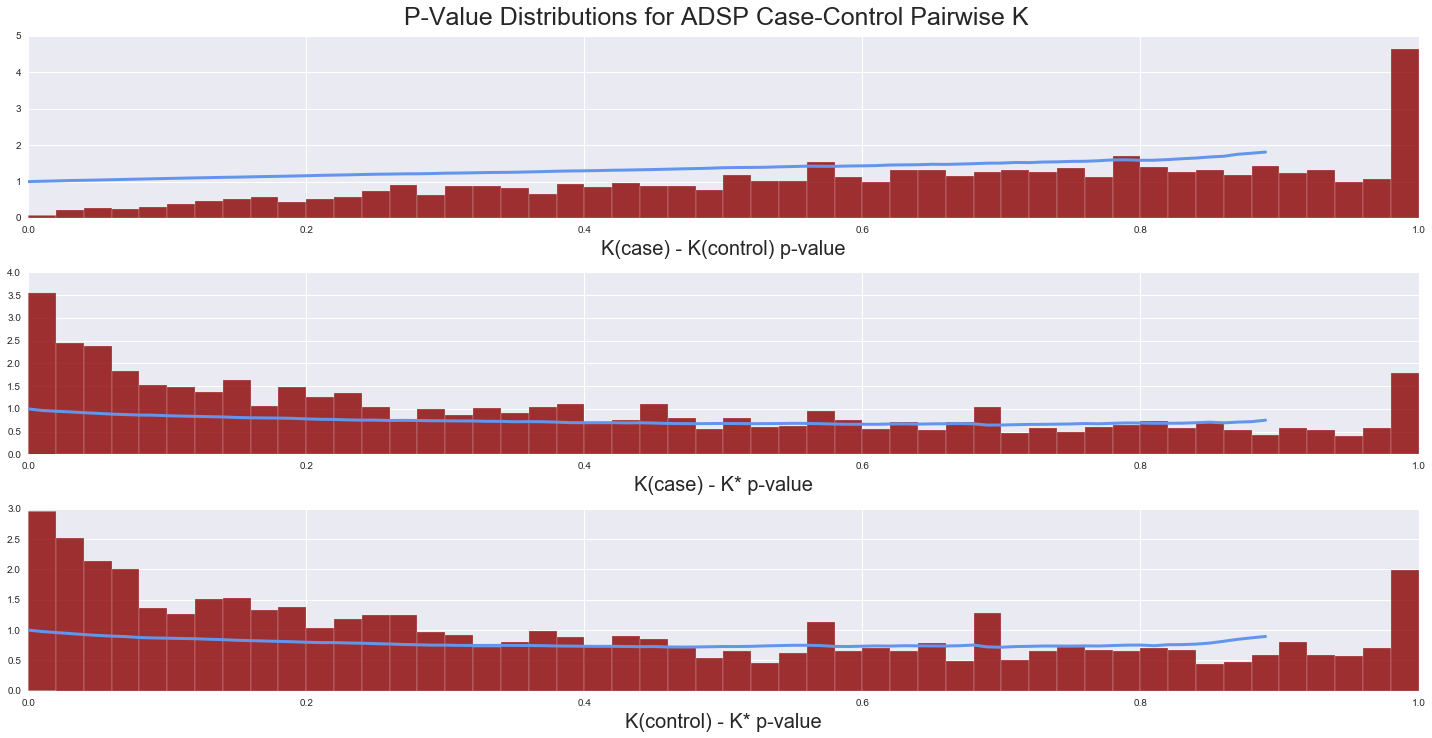

In [165]:
# P-Value Distributions
fig,ax = plt.subplots(3,1,figsize=(20,10))
plt.suptitle("P-Value Distributions for ADSP Case-Control Pairwise K",fontsize=25,y=1.02)

ax[0].set_xlabel("K(case) - K(control) p-value",fontsize=20)
# ax[0].hist(D["z_p"],bins=np.arange(0,1.02,0.02),color="darkblue",normed=True)
ax[0].hist(D["p"],bins=np.arange(0,1.02,0.02),color="darkred",normed=True,alpha=0.8)
ax[0].plot(D_lam,D_pi,lw=3,c='cornflowerblue')

ax[1].set_xlabel("K(case) - K* p-value",fontsize=20)
# ax[1].hist(KAD["z_p"],bins=np.arange(0,1.02,0.02),color="darkblue",normed=True)
ax[1].hist(KAD["p"],bins=np.arange(0,1.02,0.02),color="darkred",normed=True,alpha=0.8)
ax[1].plot(KAD_lam,KAD_pi,lw=3,c='cornflowerblue')

ax[2].set_xlabel("K(control) - K* p-value",fontsize=20)
# ax[2].hist(KBD["z_p"],bins=np.arange(0,1.02,0.02),color="darkblue",normed=True)
ax[2].hist(KBD["p"],bins=np.arange(0,1.02,0.02),color="darkred",normed=True,alpha=0.8)
ax[2].plot(KBD_lam,KBD_pi,lw=3,c='cornflowerblue')

plt.tight_layout()
plt.show()

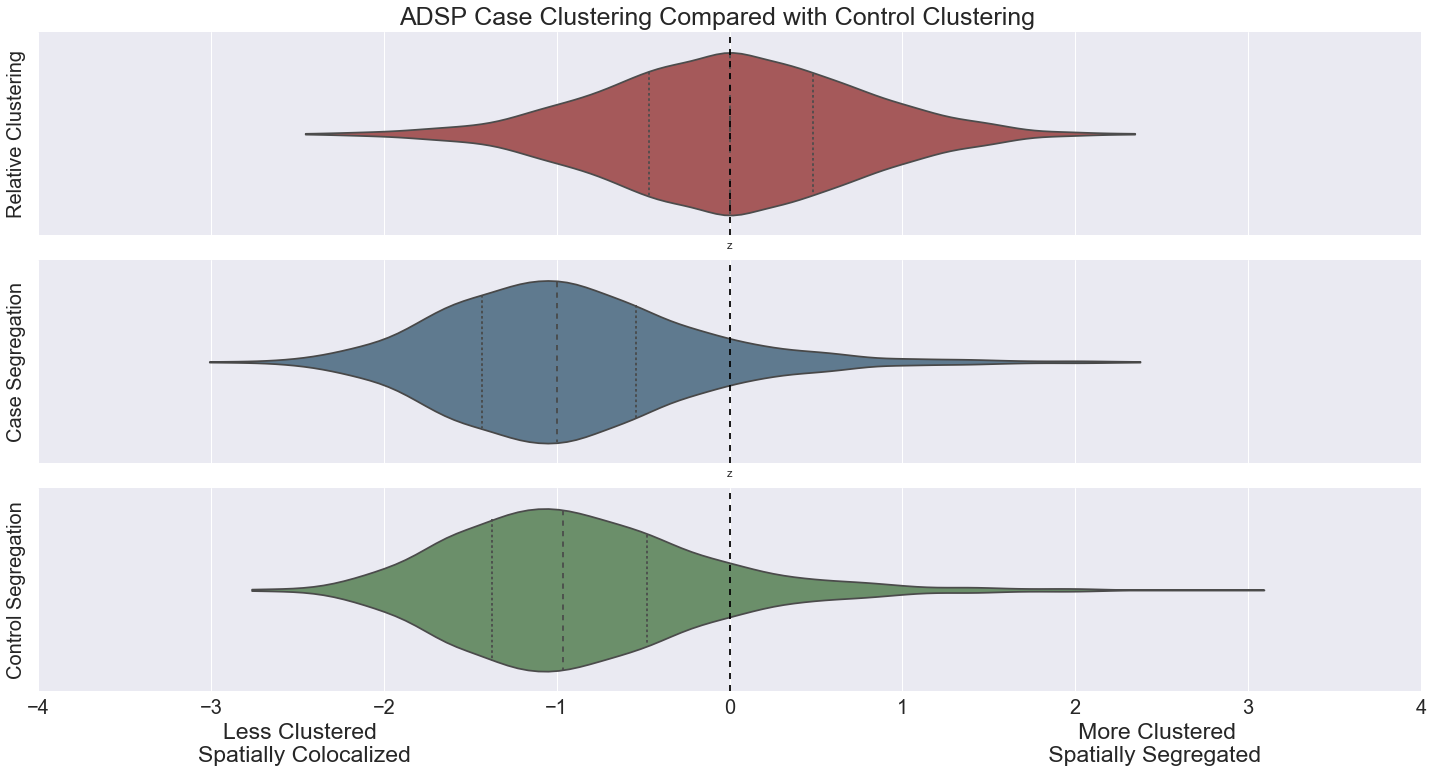

In [183]:
pal = list(sns.color_palette("Set1", n_colors=3, desat=.5))
fig,ax = plt.subplots(3,1,figsize=(20,10),sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)
sns.violinplot(  D['z'],ax=ax[0],cut=0,inner='quart',color=pal[0],scale='width')
sns.violinplot(KAD['z'],ax=ax[1],cut=0,inner='quart',color=pal[1],scale='width')
sns.violinplot(KBD['z'],ax=ax[2],cut=0,inner='quart',color=pal[2],scale='width')
ax[0].set_ylabel("Relative Clustering",fontsize=20)
ax[1].set_ylabel("Case Segregation",fontsize=20)
ax[2].set_ylabel("Control Segregation",fontsize=20)
plt.suptitle("ADSP Case Clustering Compared with Control Clustering",fontsize=25,y=1.02)
ax[0].axvline(0.,ls='dashed',c='black')
ax[1].axvline(0.,ls='dashed',c='black')
ax[2].axvline(0.,ls='dashed',c='black')
plt.tight_layout()
plt.rcParams['xtick.labelsize'] = 20
plt.xlabel("Less Clustered%sMore Clustered\nSpatially Colocalized%sSpatially Segregated"%(' '*110,' '*100),fontsize=23)
plt.show()

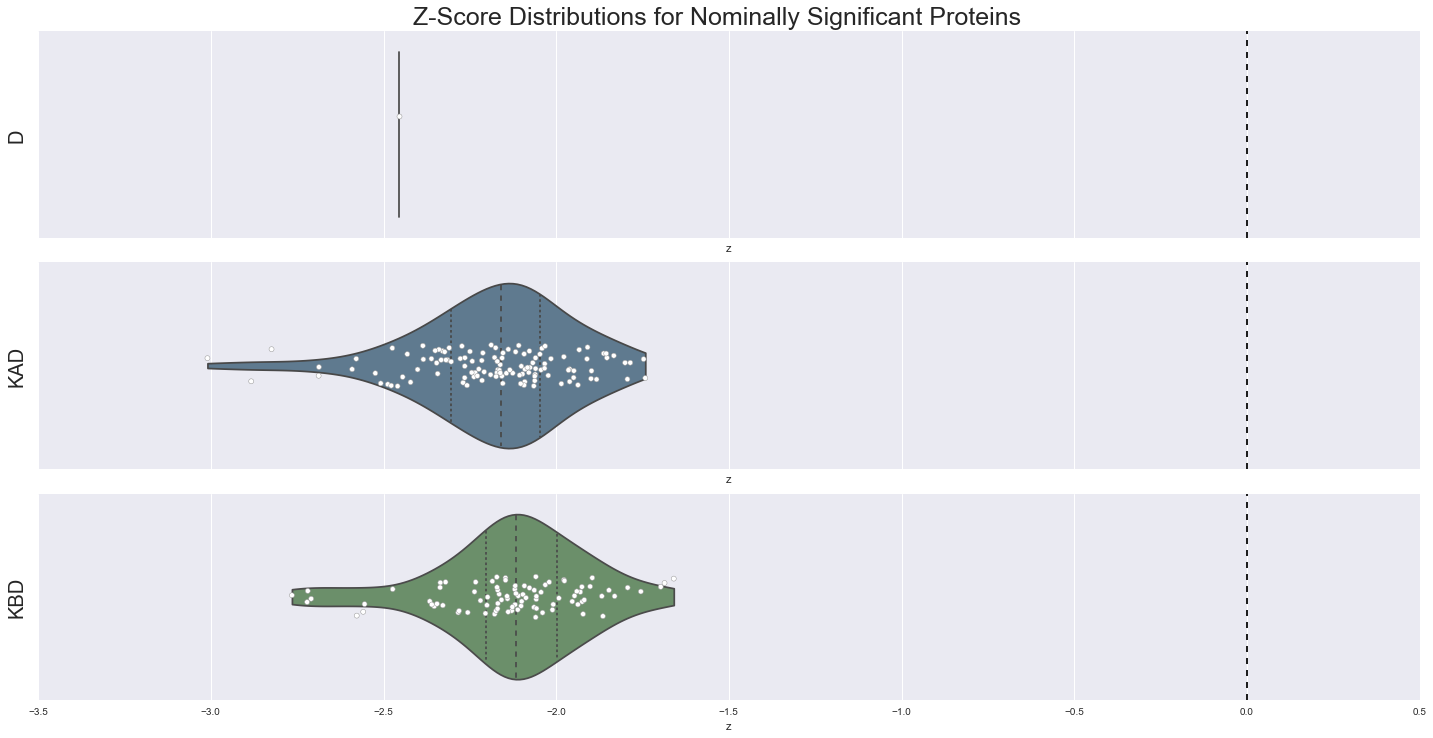

In [167]:
pal = list(sns.color_palette("Set1", n_colors=3, desat=.5))
fig,ax = plt.subplots(3,1,figsize=(20,10),sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)
sns.violinplot(  D.ix[  D['p']<0.01,'z'],ax=ax[0],cut=0,inner='quart',color=pal[0],scale='width')
sns.stripplot(   D.ix[  D['p']<0.01,'z'],ax=ax[0],jitter=True,lw=0.5,color='white')
sns.violinplot(KAD.ix[KAD['p']<0.01,'z'],ax=ax[1],cut=0,inner='quart',color=pal[1],scale='width')
sns.stripplot( KAD.ix[KAD['p']<0.01,'z'],ax=ax[1],jitter=True,lw=0.5,color='white')
sns.violinplot(KBD.ix[KBD['p']<0.01,'z'],ax=ax[2],cut=0,inner='quart',color=pal[2],scale='width')
sns.stripplot( KBD.ix[KBD['p']<0.01,'z'],ax=ax[2],jitter=True,lw=0.5,color='white')
ax[0].set_ylabel("D",fontsize=20)
ax[1].set_ylabel("KAD",fontsize=20)
ax[2].set_ylabel("KBD",fontsize=20)
plt.suptitle("Z-Score Distributions for Nominally Significant Proteins",fontsize=25,y=1.02)
ax[0].axvline(0.,ls='dashed',c='black')
ax[1].axvline(0.,ls='dashed',c='black')
ax[2].axvline(0.,ls='dashed',c='black')
plt.tight_layout()
plt.show()

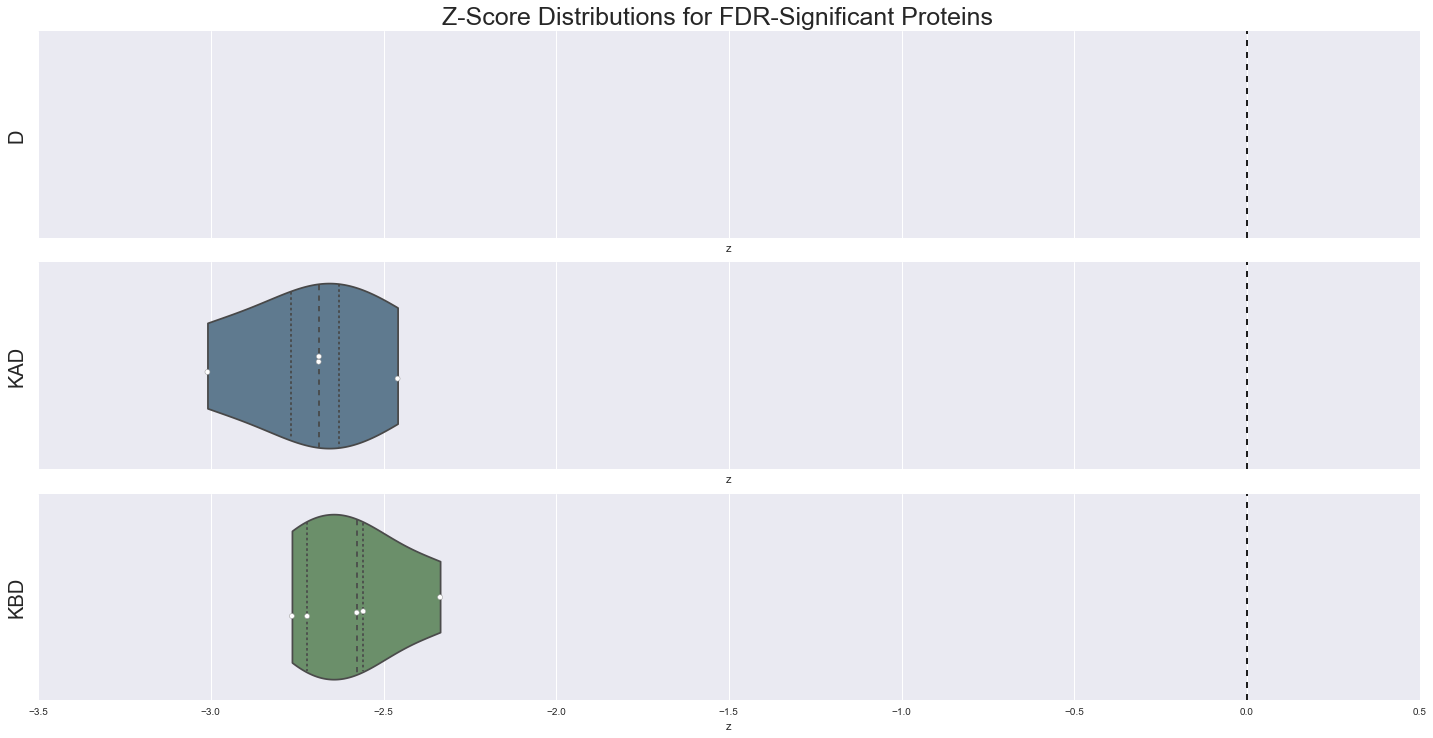

In [168]:
pal = list(sns.color_palette("Set1", n_colors=3, desat=.5))
fig,ax = plt.subplots(3,1,figsize=(20,10),sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)
sns.violinplot(  D.ix[  D['q']<0.1,'z'],ax=ax[0],cut=0,inner='quart',color=pal[0],scale='width')
sns.stripplot(   D.ix[  D['q']<0.1,'z'],ax=ax[0],jitter=True,lw=0.5,color='white')
sns.violinplot(KAD.ix[KAD['q']<0.1,'z'],ax=ax[1],cut=0,inner='quart',color=pal[1],scale='width')
sns.stripplot( KAD.ix[KAD['q']<0.1,'z'],ax=ax[1],jitter=True,lw=0.5,color='white')
sns.violinplot(KBD.ix[KBD['q']<0.1,'z'],ax=ax[2],cut=0,inner='quart',color=pal[2],scale='width')
sns.stripplot( KBD.ix[KBD['q']<0.1,'z'],ax=ax[2],jitter=True,lw=0.5,color='white')
ax[0].set_ylabel("D",fontsize=20)
ax[1].set_ylabel("KAD",fontsize=20)
ax[2].set_ylabel("KBD",fontsize=20)
plt.suptitle("Z-Score Distributions for FDR-Significant Proteins",fontsize=25,y=1.02)
ax[0].axvline(0.,ls='dashed',c='black')
ax[1].axvline(0.,ls='dashed',c='black')
ax[2].axvline(0.,ls='dashed',c='black')
plt.tight_layout()
plt.show()

In [169]:
# Identify the nominally significant proteins
# Identify the FDR-significant proteins
print "FDR-Significant Difference in Clustered-ness:"
print D.ix[    D['p']<0.01,["sid","chain","z","q"]]

print "\nFDR-Significant Preference in Nonsynonymous Neighbors"
print KAD.ix[KAD['p']<0.01,["sid","chain","z","q"]]

print "\nFDR-Significant Preference in Synonymous Neighbors"
print KBD.ix[KBD['p']<0.01,["sid","chain","z","q"]]

FDR-Significant Difference in Clustered-ness:
      sid chain         z  q
708  2IRW     C -2.455163  1

FDR-Significant Preference in Nonsynonymous Neighbors
       sid chain         z         q
51    2E0M     B -2.883229  0.126718
125   3ZYJ     B -1.742109  0.134659
164   2IUW     A -2.060981  0.123776
184   2IQC     A -2.314522  0.135361
185   4A0D     A -1.910888  0.164336
191   3ZHP     A -1.785525  0.154675
194   2J1L     A -2.215586  0.123776
195   2DWP     A -2.243077  0.126718
248   2I3Y     A -2.824284  0.101515
256   4HWT     B -1.961105  0.143182
260   4AEJ     B -2.062181  0.130000
271   3CH4     B -2.091075  0.101515
275   1ZRH     A -2.064885  0.123776
292   4HOU     A -2.100994  0.143182
336   2RJP     C -2.309836  0.139414
353   1ZNC     B -2.487618  0.101515
362   2HKY     A -1.853203  0.154675
510   2PL3     A -1.949600  0.154675
539   2JBM     L -1.961123  0.154675
551   3B8K     A -2.249778  0.152014
632   3B2D     D -2.093144  0.139414
639   3BER     A -1.899167 

In [170]:
# Identify the FDR-significant proteins
print "FDR-Significant Difference in Clustered-ness:"
print D.ix[D['q']<0.1,["sid","chain","z","q"]]

print "\nFDR-Significant Preference in Nonsynonymous Neighbors"
print KAD.ix[KAD['q']<0.1,["sid","chain","z","q"]]

print "\nFDR-Significant Preference in Synonymous Neighbors"
print KBD.ix[KBD['q']<0.1,["sid","chain","z","q"]]

FDR-Significant Difference in Clustered-ness:
Empty DataFrame
Columns: [sid, chain, z, q]
Index: []

FDR-Significant Preference in Nonsynonymous Neighbors
       sid chain         z         q
1606  3V5W     A -2.459309  0.068182
2053  3E0L     A -2.687911  0.092045
2147  3DYD     A -2.687064  0.061364
2211  3OJY     B -3.009904  0.040909

FDR-Significant Preference in Synonymous Neighbors
       sid chain         z         q
571   3BXM     A -2.558890  0.097455
1047  3L4G     B -2.336226  0.097455
1811  1WAW     A -2.765279  0.097455
2194  4BZY     A -2.577614  0.097455
2628  3TOP     B -2.721315  0.097455
